### Criando o DF original

In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os
from shapely.errors import ShapelyDeprecationWarning
from shapely.geometry import Point
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [ ]:
#File Readere create a  BD
avesAM = pd.read_csv('dataAvesAM.csv', index_col=False, delimiter = ';', keep_default_na = False,  decimal=".", quotechar='"', encoding='UTF8', low_memory=False)

#filto que a coluna ---> stateProvince == Amazonas
avesAM = avesAM.query (" stateProvince =='Amazonas'")

#BD com todas as colunas que eu quero
original = avesAM.filter(['stateProvince','kingdom','phylum','Class','order','family','genus','Species','Latitude - original','Longitude - original','year', 'month', 'sex'])
original.head()

,stateProvince,kingdom,phylum,Class,order,family,genus,Species,Latitude - original,Longitude - original,year,month,sex
133,Amazonas,Animalia,Chordata,Aves,Falconiformes,Falconidae,Daptrius,Daptrius ater,-2.9,-58.45,1967,12,M
150,Amazonas,Animalia,Chordata,Aves,Trogoniformes,Trogonidae,Trogon,Trogon melanurus,-5.916.666.667,-59.25,2012,7,M
154,Amazonas,Animalia,Chordata,Aves,Passeriformes,Thamnophilidae,Epinecrophylla,Epinecrophylla ornata,-748.333.333.333.333,-58.25,2011,7,M
161,Amazonas,Animalia,Chordata,Aves,Passeriformes,Dendrocolaptidae,Glyphorynchus,Glyphorynchus spirurus,-578.333.333.333.333,-592.166.666.666.667,2012,7,M
195,Amazonas,Animalia,Chordata,Aves,Passeriformes,Thamnophilidae,Epinecrophylla,Epinecrophylla leucophthalma,-578.333.333.333.333,-59.27,2012,7,M


In [ ]:
#corrige a latitude longetude

    #troca o nome das colunas
original.rename(columns={'Latitude - original':'Latitude'}, inplace=True)
original.rename(columns={'Longitude - original':'Longitude'}, inplace=True)
    #converte para numéricos
original['Latitude'] = pd.to_numeric(original['Latitude'], errors='coerce')
original['Longitude'] = pd.to_numeric(original['Longitude'], errors='coerce')
original['month'] = pd.to_numeric(original['month'], errors='coerce')
original['year'] = pd.to_numeric(original['year'], errors='coerce')

    #Retira colunas que são NaN, Nulo ou Vazio
original = original.dropna(subset=['Latitude'])
original = original.dropna(subset=['Longitude'])
    #filtra os valores
original = original.query("Latitude >= -10")
original = original.query("Latitude <= 2")
original = original.query("Longitude >= -72.5")
original = original.query("Longitude <= -57.5")
#ps: a coluna de anos somem quando execulta esse filtro



In [ ]:
# original.info()

### Filtro

In [ ]:
#ao apertar selecionar alguma coisa no filtro programa deve criar uma lista com esses 2 elementos
filter_select = ['order','Apodiformes'] #select[0] salva qual status ele escolheu, o nome da coluna____ex:(Class)#select[1] salva qual o nome que ele filtrou___ex:(Aves)

In [ ]:
#coluna que mostra as opções do status(ex: ordem, familia, genero etc.) sem duplicadas e organizada em ordem alfabética
colunaSelect = original[[filter_select[0]]].drop_duplicates().sort_values(by=[filter_select[0]])


In [ ]:
#VAR que salva os estados do Brasil em ordem alfabética

estados = ['Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará', 'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão', 'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Pará', 'Paraíba', 'Paraná', 'Pernambuco', 'Piauí', 'Rio de Janeiro', 'Rio Grande do Norte', 'Rio Grande do Sul', 'Rondônia', 'Roraima', 'Santa Catarina', 'São Paulo', 'Sergipe', 'Tocantins']
num_est = 3 #var que pega a qual mapa escolheu e muda de acordo com a tabela abaixo(criado pelo for)

# Amazonas = estados[3]
# Mato Grosso = estados[10]

#esse for ve o valor de cada estado
#for i in range(0,27):
#  print (estados[i],":", i)


In [ ]:
class Mapa(): #ao selecionar o lugar no mapa ele cria um obj com as novas caracteristicas

# Atributos
  mapa_select = ''
  menu_select = '' #É preenchido o selecionaro menu de opções:   #1-Lissamphibia 2-Reptilia 3-Mammalia 4-Aves 5-Peixes 6-Annelida 7-Mollusca 8-Arthropoda
  state_obj = ['','','','','','','']# kingdom = [0] | phylum = [1] | Class = [2] | order = [3] | family = [4] | genus = [5] | Species = [6]


# Método contrutor
  def __init__ (self,mapa):
    self.mapa_select = mapa
# SET menu
  def SetMenu (self,menu):
    self.menu_select = menu


# SET reino
  def SetKingdom (self,kingdom):
    self.state_obj[0] = kingdom
# SET filo
  def SetPhylum (self):
    # Cordados
      if (self.menu_select == 'Lissamphibia' or 'Reptilia' or 'Mammalia' or 'Aves' or 'Peixes'):
        self.state_obj[1] = 'Chordata'
    # Anelídeos
      elif (self.menu_select == 'Annelida'):
        self.state_obj[1] = 'Annelida'
    # Moluscos
      elif (self.menu_select == 'Mollusca'):
        self.state_obj[1] = 'Mollusca'
    # Artrópodes
      elif (self.menu_select == 'Arthropoda'):
        self.state_obj[1] = 'Arthropoda'
# SET classe
  def SetClass (self,classe):
    # Anfíbios
      if (self.menu_select == 'Lissamphibia'):
        self.state_obj[2] = 'Lissamphibia'
    # Répteis
      elif (self.menu_select == 'Reptilia'):
        self.state_obj[2] = 'Reptilia'
    # Mamíferos
      elif (self.menu_select == 'Mammalia'):
        self.state_obj[2] = 'Mammalia'
    # Aves
      elif (self.menu_select == 'Aves'):
        self.state_obj[2] = 'Aves'
    # Outro(escolhido no filtro)
      else:
        self.state_obj[2] = classe
# SET ordem
  def SetOrder (self,order):
    self.state_obj[3] = order
# SET família
  def SetFamily (self,family):
    self.state_obj[4] = family
# SET gênero
  def SetGenus (self,genus):
    self.state_obj[5] = genus
# SET espécies
  def SetSpecies (self,species):
    self.state_obj[6] = species


In [ ]:

a1 = Mapa(estados[num_est])#criando um objeto da classe Mapa de cima informando o mapa selecionado
menu_select = 'Aves'
if (menu_select == 'Aves' or 'Lissamphibia' or 'Reptilia' or 'Mammalia'):
  coluna_Padrao = 'Class'
else:
  coluna_Padrao = 'phylum'
filter_select = ['order','Apodiformes']# filtro que possui dois  elementos 1- a coluna selecionada no filtro 2- nome do que foi selecionado

match filter_select[0]: #swich case para setar os states
  case 'kingdom':
    a1.SetKingdom('Animalia')
  case 'phylum':
    a1.SetPhylum()
  case 'Class':
    a1.SetClass(filter_select[1])
  case 'order':
    a1.SetOrder(filter_select[1])
  case 'family':
    a1.SetFamily(filter_select[1])
  case 'genus':
    a1.SetGenus(filter_select[1])
  case 'Species':
    a1.SetSpecies(filter_select[1])

modificada = original[original[filter_select[0]]== filter_select[1]] #aqui cria uma tabela reserva após aplicação do filtro
modificada.head(50) #aqui mostra

,stateProvince,kingdom,phylum,Class,order,family,genus,Species,Latitude,Longitude,year,month,sex
1142,Amazonas,Animalia,Chordata,Aves,Apodiformes,Trochilidae,Thalurania,Thalurania furcata,-6.25,-59.07,2013,7.0,M
1966,Amazonas,Animalia,Chordata,Aves,Apodiformes,Trochilidae,Phaethornis,Phaethornis philippii,-6.75,-59.07,2013,6.0,F
6796,Amazonas,Animalia,Chordata,Aves,Apodiformes,Trochilidae,Thalurania,Thalurania furcata,-6.25,-59.07,2013,7.0,M


In [ ]:
#modificada.info() # observa qual o tipo das colunas

### Gráfico de Pizza!

In [ ]:
#.shape[0] mostra a quantidade de linhas
#.shape[1] mostra a quantidade de colunas

In [ ]:
#coluna das opções de anos
opções_ano = modificada.filter(['year']).drop_duplicates().sort_values(by='year', ascending=False)
opções_ano.head(opções_ano.shape[0])

,year
1142,2013


In [ ]:
# prompt: i have a DF call avesAM_modificada and i need one loop that create a list where every element is a number with the quantity of numbers of rows you have for each year,
#the code that takes a list with all the years without duplicates and in descending order is as follows:
#opções_ano = avesAM_modificada.filter(['year']).drop_duplicates().sort_values(by='year', ascending=False)

lista_quantidade = []
for i in range(0,opções_ano.shape[0]):
  ano = opções_ano.iloc[i,0]
  quantidade = modificada.query("year == @ano").shape[0]
  lista_quantidade.append(quantidade)

#olha todo os elementos da lista
for i in range(len(lista_quantidade)):
  print (lista_quantidade[i])


3


In [ ]:
#gráfico
fig = go.Figure(data = go.Pie(labels = opções_ano,
                              values = lista_quantidade,
                              hole = 0.5))
fig.show()

### Gráfico de Barras

In [ ]:
#coluna das opções de anos
opções_ano = modificada.filter(['year']).drop_duplicates().sort_values(by='year', ascending=False)
opções_ano.head(opções_ano.shape[0])

,year
1142,2013


In [ ]:
ano = 2013
AvesYear = modificada.query("year==@ano")

In [ ]:
meses = ['JAN','FEV','MAR','ABR','MAI','JUN','JUL','AGO','SET','OUT','NOV','DEZ']
lista_quantidade_mes = []

for i in range(1,13):
  quantidade_mes = AvesYear.query("month == @i").shape[0]
  lista_quantidade_mes.append(quantidade_mes)

#olha todo os elementos da lista
for i in range(len(lista_quantidade_mes)):
  print (lista_quantidade_mes[i])

0
0
0
0
0
1
2
0
0
0
0
0


<BarContainer object of 12 artists>

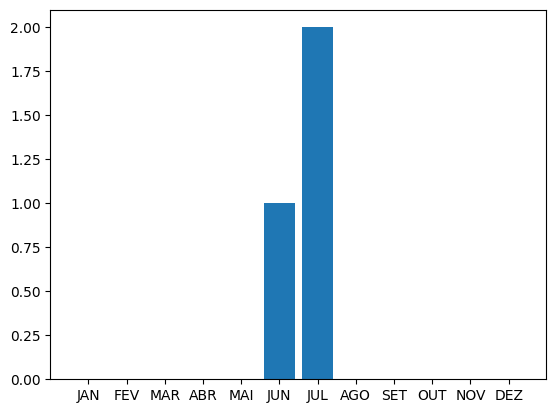

In [ ]:
plt.bar(meses,lista_quantidade_mes)

###Mapa


<ipython-input-19-03a2b76e9d92>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: >

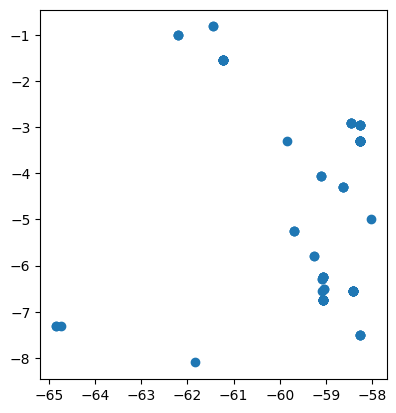

In [ ]:
#criação do GDF para mapa
df_mapa = original[['Latitude','Longitude']]
df_mapa['geometry'] = None

for index, row in df_mapa.iterrows():
    df_mapa.loc[index, 'geometry'] = Point(row.Longitude, row.Latitude)

gdf = gpd.GeoDataFrame(df_mapa, geometry='geometry')
gdf.head(100).plot()

<Axes: >

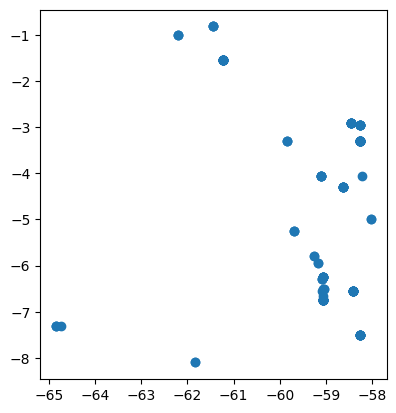

In [ ]:
gdf.plot()

ERROR:fiona._env:Error in fread() reading object of size 169560 at offset 1931668 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 265816 at offset 2101228 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 31432 at offset 2367044 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 494376 at offset 2398476 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 103432 at offset 2892852 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 100424 at offset 2996284 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 60104 at offset 3096708 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 312328 at offset 3156812 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 162456 at offset 3469140 from .shp file
ERROR:fiona._env:Error in fread() reading object of size 206664 at offset 3631596 from .shp file
ERROR:fiona._env:Error in fread(

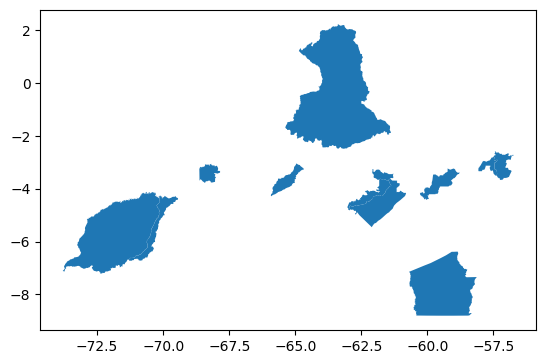

In [ ]:
mapa_am = gpd.read_file('/content/AM_Municipios_2022.shp')
mapa_am.plot()
plt.show()

<Axes: >

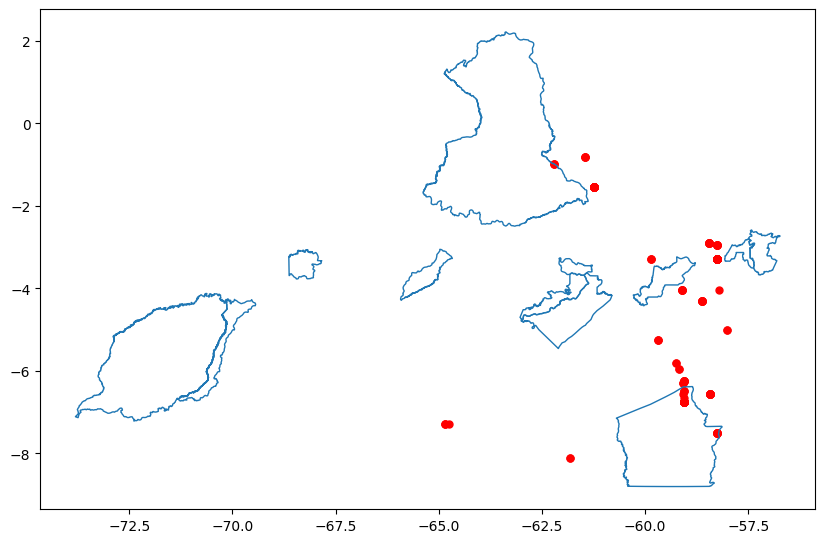

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
mapa_am.boundary.plot(ax=ax, linewidth=1)
gdf.plot(ax=ax, color='red', markersize=25, label='Aves')

In [ ]:
#NOTES

# TENTATIVAS: 1avesAM = pd.read_csv('dataAvesAM.csv') 2df = pd.read_csv('aves.csv', on_bad_lines='skip') 3df = pd.read_csv('aves.csv',  error_bad_lines=False)

#1 cordados: Anfíbios, Reptilia, Aves e Mamíferos(define e trava o REINO, FILO e CLASSE) com exeção dos Peixes que só (define e trava o REINO, FILO ) Chordata
#2 anelídeos(define e trava o REINO, FILO ) Annelida
#3 moluscos(define e trava o REINO, FILO ) Mollusca
#4 artrópodes(define e trava o REINO, FILO ) Arthropoda

#Lissamphibia(Anfíbios)
#Reptilia(repteis)
#Mammalia(Mamíferos)
#Aves(Aves)


    # MY PART: kingdom, phylum, Class, order, family, genus, Species
    # MY TEAM PART: Latitude - original, Longitude - original, year, month, sex('M','F',''ND)